## Pasajeros de Avion con Facebook Prophet

In [2]:
import pandas as pd
from prophet import Prophet


In [3]:
df = pd.read_csv('./airline_passengers.csv')

In [4]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

21:34:47 - cmdstanpy - INFO - Chain [1] start processing
21:34:47 - cmdstanpy - INFO - Chain [1] done processing


/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


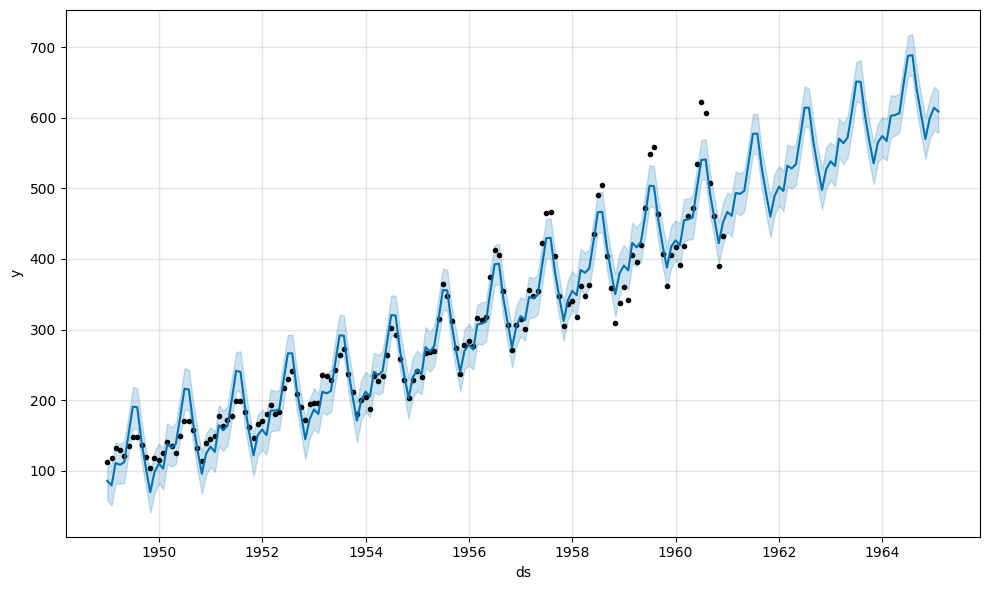

In [6]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Esta serie temporal tiene un ciclo anual, pero la estacionalidad en el pronóstico es demasiado grande al comienzo de la serie temporal y demasiado pequeña al final. En esta serie de tiempo, la estacionalidad no es un factor aditivo constante como lo supone Prophet por defecto, sino que crece con la tendencia. Esta es la estacionalidad multiplicativa.

### Cambiamos la frecuencia a multiplicativa

21:34:48 - cmdstanpy - INFO - Chain [1] start processing
21:34:48 - cmdstanpy - INFO - Chain [1] done processing
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


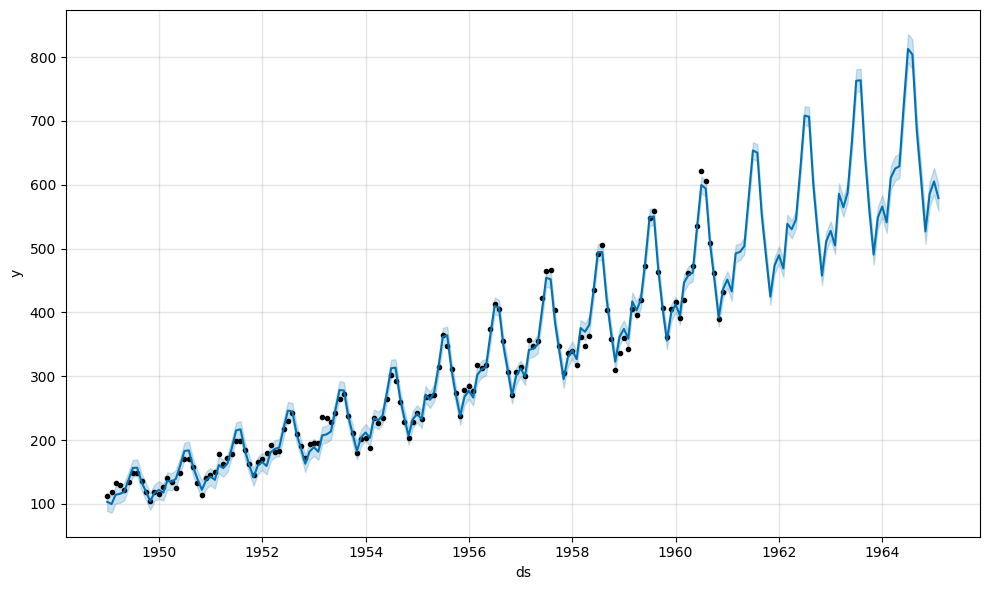

In [7]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)